In [125]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random   

In [126]:
np.random.seed(0)

In [127]:
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()

In [128]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [129]:
assert(X_train.shape[0]==Y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0]==Y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:]== (28,28)), "The dimensions of the images are not 28x28."
assert(X_test.shape[1:]== (28,28)), "The dimensions of the images are not 28x28."

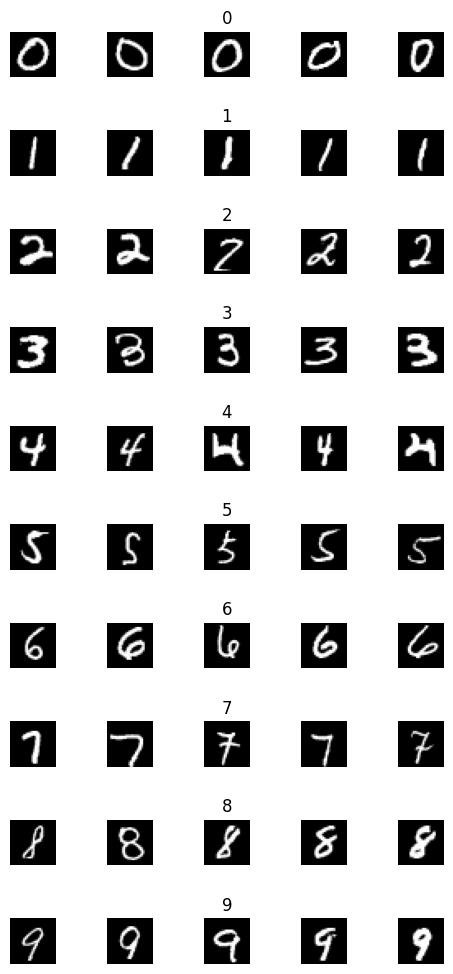

In [130]:
num_of_samples=[]
cols=5
num_classes=10
fig,axs=plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected=X_train[Y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1 )), : :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

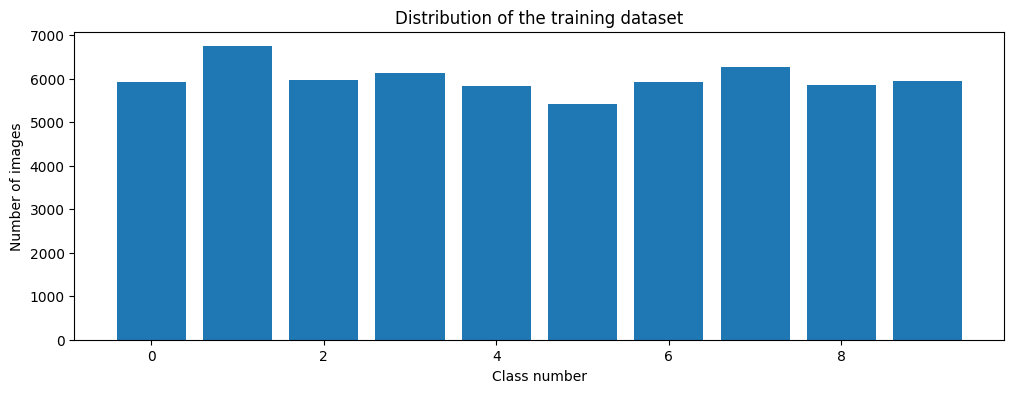

In [131]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [132]:
Y_train=to_categorical(Y_train, 10)
Y_test=to_categorical(Y_test, 10)

In [133]:
X_train=X_train/255
X_test=X_test/255

In [134]:
num_pixels=784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [135]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [136]:
model=create_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                7850      
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


c:\Users\Zharb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [137]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.8352 - val_loss: 0.2636 - val_accuracy: 0.9275
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3010 - accuracy: 0.9130 - val_loss: 0.2265 - val_accuracy: 0.9368
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9205 - val_loss: 0.2179 - val_accuracy: 0.9403
Epoch 4/10
270/270 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.9265 - val_loss: 0.1987 - val_accuracy: 0.9472
Epoch 5/10
270/270 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9287 - val_loss: 0.2107 - val_accuracy: 0.9422
Epoch 6/10
270/270 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9322 - val_loss: 0.2121 - val_accuracy: 0.9428
Epoch 7/10
270/270 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9333 - val_loss: 0.2139 - val_accuracy: 0.9375
Epoch 

Text(0.5, 0, 'epoch')

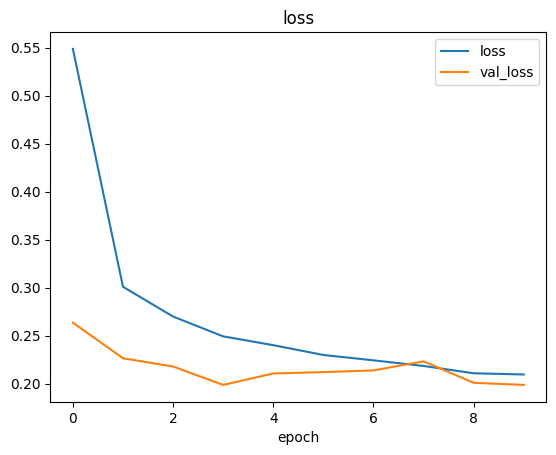

In [138]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

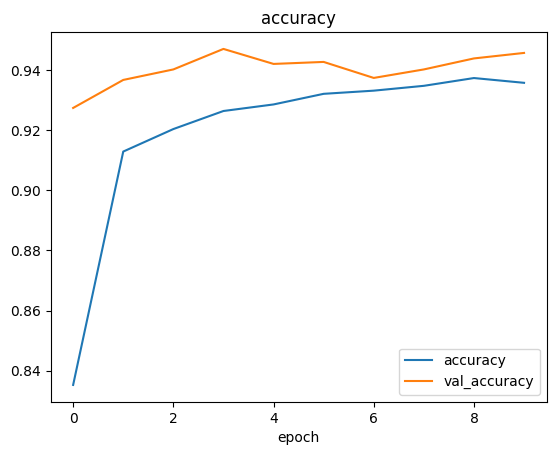

In [139]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [140]:
score= model.evaluate(X_test, Y_test, verbose=0)
print(type(score))
print('test score:', score[0])
print('test accuracy', score[1])

<class 'list'>
test score: 0.238446906208992
test accuracy 0.9320999979972839


In [141]:
import requests
from PIL import Image
url='https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)

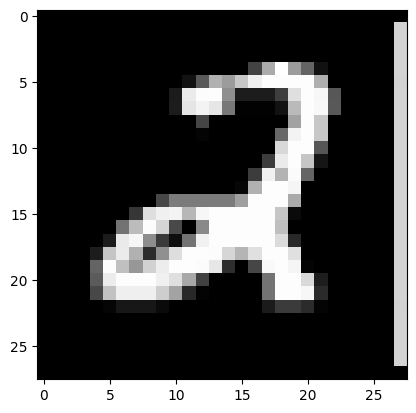

In [142]:
import cv2

img_array=np.asarray(img)
resized=cv2.resize(img_array, (28,28))
gray_scale=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [143]:
image=image/255
image=image.reshape(1,784)

In [144]:
predict_x=model.predict(image) 
prediction=np.argmax(predict_x,axis=1)
#predict_classes

print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 43ms/step
predicted digit: [2]
